# pandas and plotting with seaborn

In this notebook we will explore different ways to store data and how that simplifies (or doesn't) doing visual analysis with seaborn.

The way to store data goes beyond pandas and is a subject of statistics, but we will cover it here to learn how to change data storage to our benefit.

# Long vs wide data

There are 2 typical ways to store data: [long format and wide format](https://www.statology.org/long-vs-wide-data/). 

![wide_long](https://www.statology.org/wp-content/uploads/2021/12/wideLong1-1-768x543.png)

wide format is more intuitive because values in the first column, which acts as an index, do not repeat themselves. It is also easy to do statistics on columns.

long format has two advantages. First, some plotting libraries, such as seaborn, work best with long format. Second, it can contain more data. Indeed, in the wide format, each data point only has two labels: row and column. If we need to add more labels to a data point, the long format is more effective. Graphically, you can visualize it like this:

![long labels](https://seaborn.pydata.org/_images/data_structure_19_0.png)

Sometimes, data is a mixed format and then one needs more time and effort to convert it into long format. For a longer discussion, read [this paper](https://vita.had.co.nz/papers/tidy-data.pdf).

## hands-on work

Let us do some examples to clarify the previous concepts.

We start by importing a model data set from seaborn.

In [82]:
import pandas as pd
import seaborn as sns
flights = sns.load_dataset('flights')

This data set contains information about the number passenger flying.
Is it in wide or long format?

In [84]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Try converting it into a wide format using the [pivot method](https://pandas.pydata.org/docs/reference/api/pandas.pivot.html)

In [85]:
flights_wide = flights.pivot(values="passengers", index="year", columns="month")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a plotting library that makes a good use of pandas dataframe structure. It is based on matplotlib, but it eases a lot of plot customization and data manipulation. 

With long format, with seaborn it is easy to decide what you plot.

/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


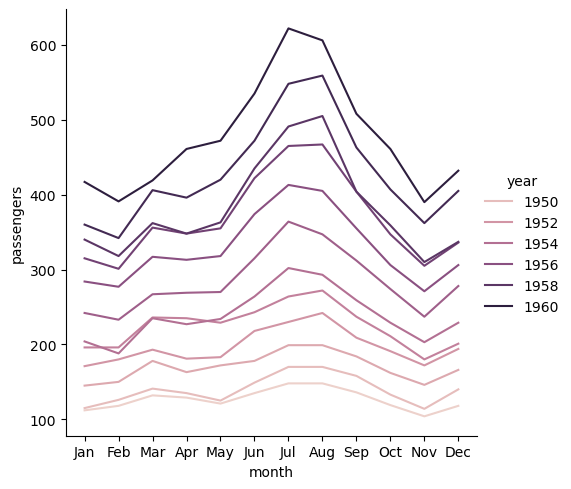

In [86]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

Now plot the same data with respect to the year, colouring by month.
Try also removing the colouring and see what happens. What is seaborn doing?

/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


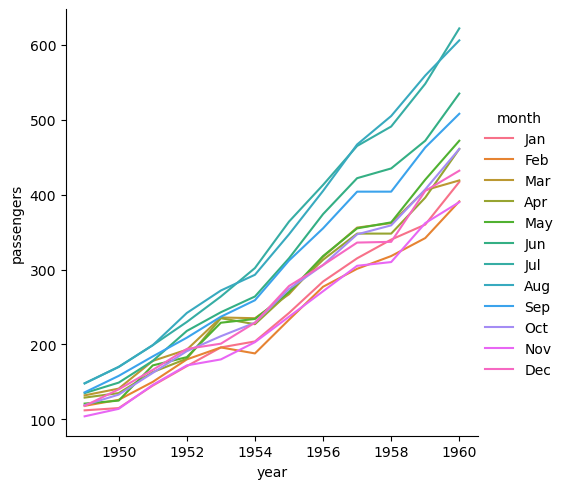

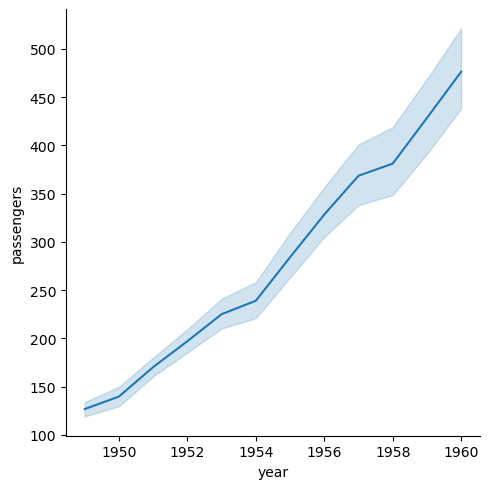

In [50]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")
sns.relplot(data=flights, x="year", y="passengers"             , kind="line")

There are many types of plots. For example, explore [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

It is left as an exercise to try to do the same plots with the `data_wide` dataframe. You will see that it is far from simple. 

However one advantage of the wide format is that pandas can give you more meaningful description of the data set. Compare the results of `flights.describe()` and `flights_long.describe()` to see it.

## what to keep

As shown in the long-form vs wide-form figure, the wide-format can accommodate less data (some data is lost, such as red or brown). Our flights data set was a curated example where data was not lost, but imagine this dataframe: 

In [52]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


When converting to a wide format, we have to choose what are the values, the index and the columns. In this case we loose `zoo`.

In [57]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


It is true that multiindices allow keeping more structured data, but this goes beyond the scope of this notebook. Keep also in mind that seaborn does not work smoothly with multiindices.
To see what multiindices are, try not giving the values argument to pivot.

In [61]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

## From wide to long

So if the long format is preferable in general and we have our data in wide format, how do we convert it to long format. 
We can use melt:

In [120]:
flights_long = flights_wide.melt(value_vars=flights_wide.columns, ignore_index=False)
flights_long

,month,value
year,,
1949,Jan,112
1950,Jan,115
1951,Jan,145
1952,Jan,171
1953,Jan,196
...,...,...
1956,Dec,306
1957,Dec,336
1958,Dec,337


Mmmm. This looks similar to our original `flights` dataframe, but not exactly the same. We still need to reset the index and sort it. And name the values as "passengers". But our version already works as the previous `flights`did:

/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


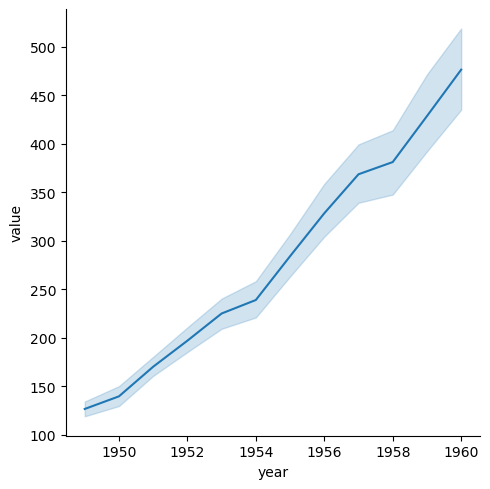

In [130]:
sns.relplot(data=flights_long, x="year", y="value"             , kind="line")

To reconver the original format, we need to reset the index and name the values. That is easy:

In [145]:
df=flights_wide.melt(value_vars=flights_wide.columns, ignore_index=False,
                 value_name="passengers").reset_index()

,year,month,passengers
0,1949,Jan,112
1,1950,Jan,115
2,1951,Jan,145
3,1952,Jan,171
4,1953,Jan,196
...,...,...,...
139,1956,Dec,306
140,1957,Dec,336
141,1958,Dec,337
142,1959,Dec,405


But now we need to sort by year (easy) and by month. The latter is hard, because alphabetical sorting will not work. So this involves advanced pandas skills. [Here is an answer](https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name) on how to do it. For the sake of completeness you have it here:

In [146]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

In [147]:
df.sort_values(by=['year','month'],inplace=True)
df

,year,month,passengers
0,1949,Jan,112
12,1949,Feb,118
24,1949,Mar,132
36,1949,Apr,129
48,1949,May,121
...,...,...,...
95,1960,Aug,606
107,1960,Sep,508
119,1960,Oct,461
131,1960,Nov,390


## Yes, but... plotting relational data 

The long format is ideal when a numerical data is labeled based on different categorical data. We will now work with the penguins data set, which contains several [measurements on different penguin species](https://github.com/allisonhorst/palmerpenguins).

For example, the peak length can be plotted with respect to the species:

<Axes: xlabel='species', ylabel='flipper_length_mm'>

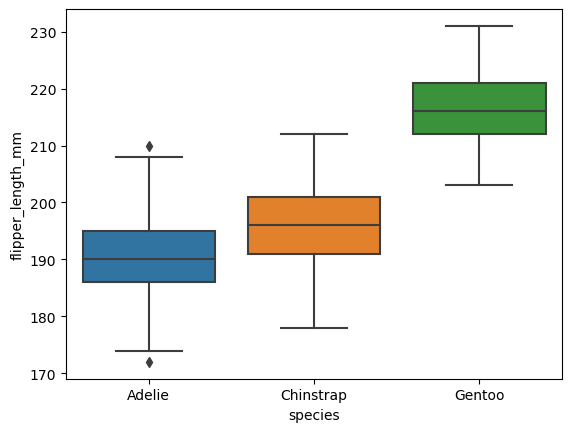

In [70]:
penguins = sns.load_dataset("penguins")
sns.boxplot(data=penguins, y="flipper_length_mm", x="species")

or with respect to the sex (do it): 

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

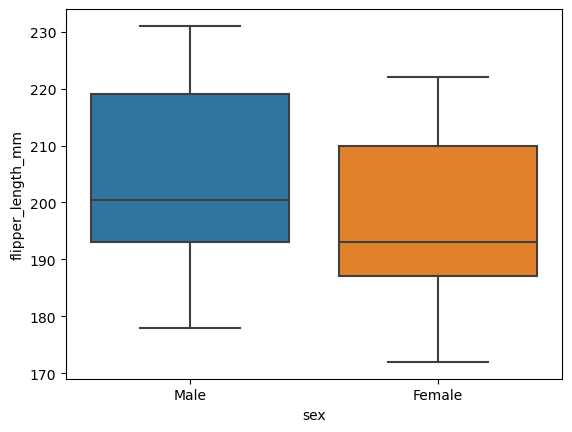

In [73]:
sns.boxplot(data=penguins, y="flipper_length_mm", x="sex")

But when we want to relate when numerical data set with another, it is best to have them as different columns. For example, here we relate the flipper length with the body mass:

/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


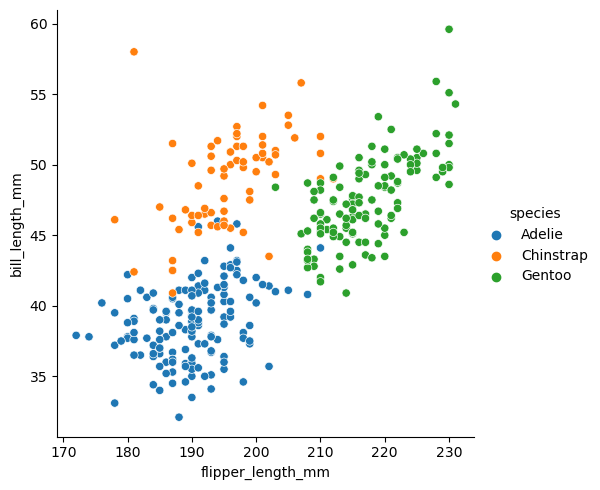

In [79]:
sns.relplot(data=penguins, x="flipper_length_mm", 
                y="bill_length_mm", hue="species")

Seaborn can also do linear regressions automatically with [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html). Try it:

/home/ramon/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


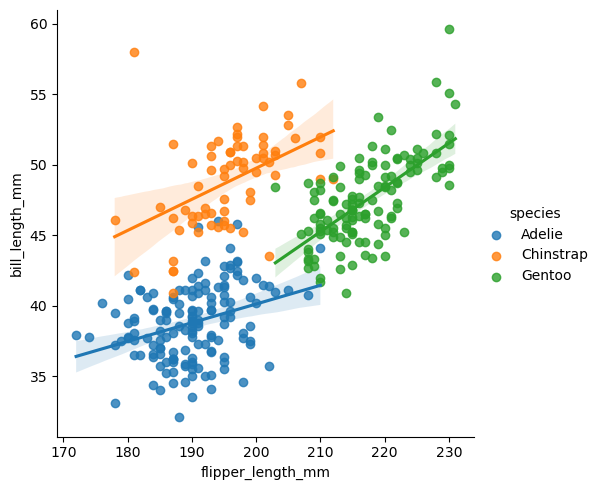

In [80]:
sns.lmplot(data=penguins, x="flipper_length_mm", 
                y="bill_length_mm", hue="species")

So remember to keep values of numerical data that need to remain separated (to be related) as separate columns. If you want, you can still melt the dataframe. As an exercise, try doing it, and see that reproducing the previous plots become more complex.

In [154]:
penguins_long =penguins.melt(id_vars=["species", "island", "sex"],
    value_vars=["bill_length_mm",
                "bill_depth_mm",
                "flipper_length_mm",
                "body_mass_g"],
          var_name="property"
         )
penguins_long.head()

,species,island,sex,property,value
0,Adelie,Torgersen,Male,bill_length_mm,39.1
1,Adelie,Torgersen,Female,bill_length_mm,39.5
2,Adelie,Torgersen,Female,bill_length_mm,40.3
3,Adelie,Torgersen,NaN,bill_length_mm,NaN
4,Adelie,Torgersen,Female,bill_length_mm,36.7


<Axes: xlabel='species', ylabel='value'>

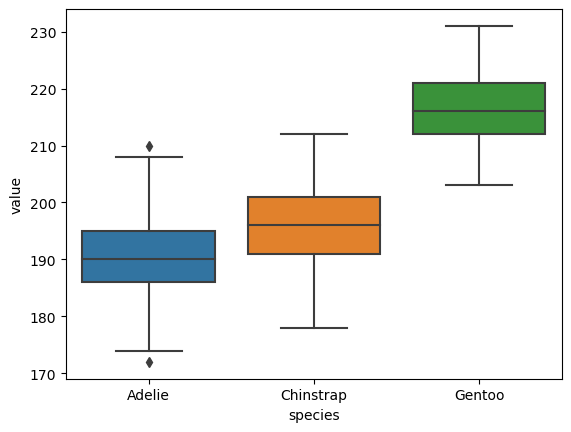

In [153]:
sns.boxplot(data=penguins_long[penguins_long.property=="flipper_length_mm"],
            y="value", x="species")

In summary, long and wide format have advantages and disadvantages so it is important to be familiar with pandas reshaping methods to be able to transform your data. A longer discussion with more examples can be found in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html).